Duplication of *k_mers_rel_all* to try to compare just xenopus vs. human -> not success

In [1]:
import pandas as pd
import time
import numpy as np
from enum import IntEnum
from datetime import datetime as dt
import os
import seaborn as sns
import xlsxwriter
from matplotlib import pyplot as plt
import swco

In [3]:
'''
def match_scaffold(k, specie, scaffold, min):
    df_k_mers = pd.read_csv('../Data/Intermediate/' + str(k) + '_mers.csv')

    sp_sca = specie + '_' + scaffold

    df_query = df_k_mers[df_k_mers['Specie_Scaffold'].str.contains(sp_sca, case=False)]

    df_query['Specie_Scaffold'] = df_query['Specie_Scaffold'].str.replace("\['", "")
    df_query['Specie_Scaffold'] = df_query['Specie_Scaffold'].str.replace("'\]", "")
    
    sep = df_query['Specie_Scaffold'].str.split("', '", expand=True)
    df_query = sep.merge(df_query[str(k) + '_mers'], left_index=True, right_index=True, how='right')
    melt = pd.melt(df_query, id_vars=[str(k) + '_mers']).dropna().drop('variable',1).rename(columns = {'value':'Specie_Scaffold'})
    
    match = melt.groupby('Specie_Scaffold', as_index=False).count().rename(columns={str(k) + '_mers':'# Appearances'}).sort_values('# Appearances', ascending=False)
    match[['Specie', 'Scaffold']] = match['Specie_Scaffold'].str.split("_", n = 1, expand=True)
    match = match.loc[match['# Appearances'] > min, ['Specie', 'Scaffold', '# Appearances']]

return match
'''    

In [2]:
# To load all of them at once and afterwards accessing one by one, this might be an option.
#https://towardsdatascience.com/a-simple-trick-to-load-multiple-excel-worksheets-in-pandas-3fae4124345b
# Define filepath
filepath = '../Data/Raw/Tables_Filtered_IK_format.xlsx'

# Load Excel file using Pandas with `sheet_name=None`
df_dict = pd.read_excel(filepath, sheet_name=None)

# Preview
#df_dict

# Get a specific one
#human = df_dict.get('Human')

# aprox 3 min 40 secs

In [3]:
# Data cleaning for each specie
df_species = pd.DataFrame()

species = df_dict.keys()

for s in species:
    aux = df_dict.get(s)
    aux['Specie'] = s
    df_species = pd.concat([df_species, aux])

df_species['Gene'] = df_species['Locus'].str.split('(\d+)').str[0] + df_species['Strand']
df_species['Gene_non_or'] = df_species['Locus'].str.split('(\d+)').str[0]
df_species.reset_index(inplace= True)

df_species = df_species[df_species['Gene'].str.contains('LOC') == False]  

In [4]:
# Load all the human scaffolds
human = df_species[df_species['Specie'].str.contains('Human', case=False)]
human_sca = human.groupby('Replicon Accession', as_index = False)['Gene_non_or'].count()
human_sca.rename(columns={'Gene_non_or':'# Genes'}, inplace=True)

target_sca = human_sca.loc[human_sca['# Genes'] > 9].sort_values('# Genes', ascending = False)
target_sca = target_sca['Replicon Accession']
target_sca = target_sca.reset_index()

In [5]:
xenopus = pd.read_csv('../Data/Raw/xenopus_genome_proc.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../Data/Raw/xenopus_genome_proc.csv'

In [ ]:
# Save our results afterwards
path = '../Data/S_W_Intermediate/Scaffold/' # + query_specie + '_' + target_specie + '_' + dt.now().strftime('%Y%m%d_%H%M%S') + '.xlsx'
timestamp = dt.now().strftime('%Y%m%d_%H%M%S')

In [21]:
query_sca = swco.match_scaffold( 8, 'human', 'NC_000005.10', 5)
query_sca

C:\Users\bertr\AppData\Local\Temp\ipykernel_16468\1810942397.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df_query['Specie_Scaffold'] = df_query['Specie_Scaffold'].str.replace("\['", "")
C:\Users\bertr\AppData\Local\Temp\ipykernel_16468\1810942397.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['Specie_Scaffold'] = df_query['Specie_Scaffold'].str.replace("\['", "")
C:\Users\bertr\AppData\Local\Temp\ipykernel_16468\1810942397.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df_query['Specie_Scaffold'] = df_query['Specie_Scaffold'].str.replace("'\]", "")
C:\Users\bertr\AppData\Local\Temp\ipykernel_16468\1810942397.py:9: Setting

,Specie,Scaffold,# Appearances
53,Human,NC_000005.10,767
79,Papio,NC_018157.1,531
52,Gorilla,NC_018429.2,310
65,Monodelphis,NC_008803.1,93
64,Monodelphis,NC_008801.1,77
38,Croco,NW_017728909.1,59
67,Orca,NW_004438453.1,57
57,Koala,NW_018343955.1,41
0,Aadvark,NW_006921643.1,37
39,Croco,NW_017728914.1,31


In [27]:
target_sca.iloc[:,1]

0     NC_000001.11
1     NC_000019.10
2     NC_000002.12
3     NC_000011.10
4     NC_000017.11
          ...     
68     NT_187517.1
69     NT_187640.1
70     NT_187661.1
71     NT_187668.1
72     NT_187686.1
Name: Replicon Accession, Length: 73, dtype: object

In [36]:
query_sca

,Specie,Scaffold,# Appearances
199,Pogona,NW_018150701.1,19
209,Pogona,NW_018150968.1,17
201,Pogona,NW_018150741.1,13
198,Pogona,NW_018150698.1,12
207,Pogona,NW_018150936.1,8
...,...,...,...
15,Aadvark,NW_006921942.1,16
11,Aadvark,NW_006921756.1,14
8,Aadvark,NW_006921723.1,11
9,Aadvark,NW_006921732.1,9


In [6]:
target_specie = 'Human'

# Save our results afterwards
path = '../Data/S_W_Intermediate/Scaffold/' # + query_specie + '_' + target_specie + '_' + dt.now().strftime('%Y%m%d_%H%M%S') + '.xlsx'
timestamp = dt.now().strftime('%Y%m%d_%H%M%S')

# Parameters
params = []
params = pd.DataFrame({
    'Description': ['', 'Parameters', 'Match', 'Mismatch', 'First gap', 'Second gap'], 
    'Value': ['', '', swco.Score.MATCH, swco.Score.MISMATCH, swco.Score.FIRST_GAP, swco.Score.CONS_GAP]})

for scaffold in target_sca.iloc[:,1]:        

    target_seq = human[df_species['Replicon Accession'] == scaffold]
    target_seq_name = target_specie + '_' + scaffold
    target_seq_or = target_seq

    writer = pd.ExcelWriter(path + target_specie + '_' + scaffold + '_' + timestamp + '.xlsx', engine = 'xlsxwriter')

    #os.makedirs(path)

    results = []
    results = pd.DataFrame(data = {'Specie':['Human'], 'Scaffold': [scaffold], '% Covered Target sequence':[''], '% Covered Scaffold':[''], 'Number of consecutive genes':['']})
    #results = pd.DataFrame(data = {'Accession', '% Covered Target sequence', '% Covered Accession', 'Number of consecutive genes'})

    query_sca = swco.match_scaffold( 8, 'human', scaffold, 5)
    query_sca = query_sca[(query_sca['Specie'].str.contains(target_specie, case=False)) == False].sort_values(['Specie', '# Appearances'], ascending=False)
    query_sca


    for i in range(0, len(query_sca)):
        
        if query_sca.iloc[i, 0] != query_sca.iloc[i-1, 0]:
            target_seq = target_seq_or
            
        query_specie = query_sca.iloc[i, 0]
        query_scaffold = query_sca.iloc[i,1]

        query_seq = df_species.loc[(df_species['Specie'] == query_specie) & (df_species['Replicon Accession'] == query_scaffold)]
        query_seq_name = query_specie + '_' + query_scaffold

        print(target_seq_name, query_seq_name)

        # Executing the Smith Waterman local alignment algorithm
        aligned_query_seq = []
        aligned_target_seq = []
        index_query_seq = []
        index_target_seq = []
        matrix = [[]]

        tic = time.perf_counter()
        aligned_query_seq, aligned_target_seq, index_query_seq, index_target_seq, max_score, max_index, max_i, max_j, matrix = swco.smith_waterman(query_seq, target_seq)
        toc = time.perf_counter()

        # Time
        d = toc - tic
        print('Computed in %s'%time.strftime('%H:%M:%S', time.gmtime(d)))

        all = []

        all = swco.merge(query_seq, target_seq, aligned_query_seq, index_query_seq, aligned_target_seq, index_target_seq)

        all = swco.duplicate(all)

        index_query_seq_no_gaps = []
        index_target_seq_no_gaps = []
        index_query_seq_no_gaps = list(filter(lambda c: c!= '-', index_query_seq))
        index_target_seq_no_gaps = list(filter(lambda c: c!= '-', index_target_seq))

        summary = []
        summary = pd.DataFrame({
            'Description' : ['Query Sequence', 'Length Query Sequence', 'Target Sequence', 'Length Target Sequence', 'Score', '', 'Aligned Query Sequence initial position', 'Aligned Query Sequence final position', 'Aligned Query Sequence length', '', 'Aligned Target Sequence initial position', 'Aligned Target Sequence final position', 'Aligned Target Sequence length'],
            'Value': [query_seq_name, len(query_seq), target_seq_name, len(target_seq), max_score, '', index_query_seq_no_gaps[0], 
                        index_query_seq_no_gaps[-1], index_query_seq_no_gaps[-1] - index_query_seq_no_gaps[0], '', index_target_seq_no_gaps[0], 
                        index_target_seq_no_gaps[-1], index_target_seq_no_gaps[-1] - index_target_seq_no_gaps[0]]
        })

        summary = pd.concat([summary, params])

        aligned_query_seq_no_gaps = []
        aligned_target_seq_no_gaps = []
        aligned_query_seq_no_gaps = list(filter(lambda c: c!= '-', aligned_query_seq))
        aligned_target_seq_no_gaps = list(filter(lambda c: c!= '-', aligned_target_seq)) 

        #KPIs
        perc_align_query_seq = len(aligned_query_seq_no_gaps) / len(query_seq)
        perc_align_target_seq = len(aligned_target_seq_no_gaps) / len(target_seq)

        kpi = []
        kpi = pd.DataFrame({
            'Description': ['','KPIs','% Covered Target sequence', '% Covered Scaffold', 'Number of consecutive genes', ''], #include where duplicates occur
            'Value': ['','', perc_align_target_seq, perc_align_query_seq, len(all), '']
        })

        result_perc = all.groupby('Result').count() / all.shape[0]
        result_perc = result_perc.reset_index().iloc[:,[0,1]]
        result_perc.rename(columns = {'Result':'Description', 'Query Sequence Original Position': 'Value'}, inplace=True)

        summary = pd.concat([summary, kpi, result_perc]) # summary.append(kpi)

        # Write
        summary.to_excel(writer, sheet_name = 'Sum_' + query_seq_name, index = False, header=False)
        all.to_excel(writer, sheet_name = 'Comp_' + query_seq_name, index = False)

        actual_results = pd.DataFrame(data = {'Specie':[query_specie], 'Scaffold': [query_scaffold], '% Covered Target sequence': [perc_align_target_seq], '% Covered Accession': [perc_align_query_seq], 'Number of consecutive genes': [len(all)]})
                                    
        results = pd.concat([results, actual_results])
        
        heatmap = sns.heatmap(matrix)
        plt.title('Heatmap of ' + target_seq_name + ' vs. ' + query_seq_name, fontsize = 12)
        plt.savefig(path + 'Images/' + timestamp + '_' + query_seq_name + '.png')
        plt.clf()

        workbook  = writer.book
        worksheet = writer.sheets['Sum_' + query_seq_name]
        worksheet.insert_image('H2', path + 'Images/' + timestamp + '_' + query_seq_name + '.png')

        # Remove match parts, when we have the same specie; and clean variables
        prev = []
        after = []
        prev = target_seq.loc[target_seq['index'] < index_target_seq_no_gaps[0] + 1]
        after = target_seq.loc[index_target_seq_no_gaps[-1] - 1 < target_seq['index']]

        target_seq = pd.concat([prev, after])
        del heatmap, perc_align_target_seq, perc_align_query_seq, result_perc

    results.to_excel(writer, sheet_name = 'Results', index = False)
    writer.sheets['Results'].activate()
    writer.save()   


C:\Users\bertr\AppData\Local\Temp\ipykernel_35820\3837593561.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_seq = human[df_species['Replicon Accession'] == scaffold]
c:\Users\bertr\LRZ Sync+Share\Thesis\Code\swco.py:59: FutureWarning: The default value of regex will change from True to False in a future version.
  df_query['Specie_Scaffold'] = df_query['Specie_Scaffold'].str.replace("\['", "")
c:\Users\bertr\LRZ Sync+Share\Thesis\Code\swco.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query['Specie_Scaffold'] = df_query['Specie_Scaffold'].str.replace("\['", "")
c:\Users\bertr\LRZ Sync+Share\Thesis\Code\swco.py:60: FutureWarning: The default value of regex will change from True to False in a f

Human_NC_000001.11 Human_NC_000001.11


KeyboardInterrupt: 

In [61]:
aligned_query_seq

[]

In [57]:
results.to_excel(writer, sheet_name = 'Results', index = False)
writer.sheets['Results'].activate()
writer.save()   

0

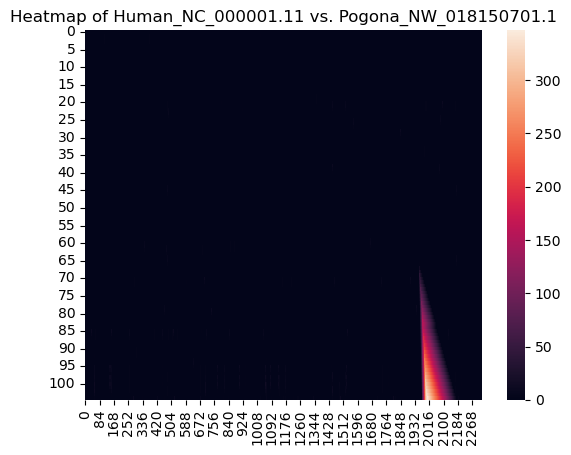

In [55]:
        heatmap = sns.heatmap(matrix)
        plt.title('Heatmap of ' + target_seq_name + ' vs. ' + query_seq_name, fontsize = 12)
        plt.savefig(path + 'Images/' + timestamp + '_' + query_seq_name + '.png')
        #plt.clf()

        workbook  = writer.book
        worksheet = writer.sheets['Sum_' + query_seq_name]
        worksheet.insert_image('H2', path + 'Images/' + timestamp + '_' + query_seq_name + '.png')